<a href="https://colab.research.google.com/github/Edwin1719/Polars-EDA/blob/main/ETL__Polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESO ETL Y EDA CON LIBRERIA POLARS

![texto del vínculo](https://media.licdn.com/dms/image/D5622AQHdVbfs8-qHHg/feedshare-shrink_800/0/1695092613884?e=2147483647&v=beta&t=hHe0_sTi6ahfQztoOSiDiV_10hfOwnz8u5ZdimwDho8)

[Enlace Documentacion Libreria Polars](https://docs.pola.rs/)

## **Importacion de Librerias y Recursos**

In [98]:
## Librerias y Recursos
!pip install fastexcel -q
!pip install xlsxwriter -q
import polars as pl
import pandas as pd
from polars import Config
from polars import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
Config.set_fmt_str_lengths(50)

polars.config.Config

In [100]:
# Conexion a Google Drive con los Dataframe
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lectura del Dataset, seleccion de Atributos y Proceso ETL**

In [101]:
# Importar BaseTickets.csv y renombrar columna 'Numero Ticket' por 'TicketID'
df = pl.read_csv(source='/content/drive/MyDrive/BaseTickets.csv', separator=';').rename({'Numero Ticket': 'TicketID'})

# Filtrar solo TicketID que empiezan con WO con funcion "filter"
df = df.filter(pl.col("TicketID").str.starts_with("WO"))

# Seleccionar columnas a usar con funcion "select" y asignar tipos de datos con funcion "cast"
df = df.select('TicketID', 'Item', 'Ubicacion', 'Service Desk', 'Estado', pl.col('Fecha Creacion').cast(pl.Date),
               pl.col('Fecha Cierre').cast(pl.Date))

# Ordenar por columnas "sort" y eliminar duplicados a partir de la columna TicketID con "unique(subset="
df = df.sort(['TicketID', 'Fecha Creacion']).unique(subset=['TicketID'], keep='last', maintain_order=True)

In [102]:
# Division de la Columna Ubicacion y renombrado de columnas creadas
Tickets = df.with_columns([
    pl.col("Ubicacion")
    .str.split_exact(" - ", 1)
    .struct.rename_fields(["Agencia", "AgenciaID"])
    .alias("fields"),
]).unnest('fields')

In [103]:
Tickets.head(5)

TicketID,Item,Ubicacion,Service Desk,Estado,Fecha Creacion,Fecha Cierre,Agencia,AgenciaID
str,str,str,str,str,date,date,str,str
"""WO0000004851449""","""SENSOR DE MAMPARA""","""BUSTAMANTE Y RIVERO - 215010""","""Zona Norte""","""Cerrado""",2023-01-02,2023-01-02,"""BUSTAMANTE Y RIVERO""","""215010"""
"""WO0000004851454""","""SENSOR DE MAMPARA""","""PURUCHUCO - 191020""","""Zona Sur""","""Cerrado""",2023-01-02,2023-01-02,"""PURUCHUCO""","""191020"""
"""WO0000004851457""","""PIR ANTEBOVEDA""","""COLONIAL - 192035""","""Zona Sur""","""Cerrado""",2023-01-02,2023-01-02,"""COLONIAL""","""192035"""
"""WO0000004851462""","""SENSOR DE MAMPARA""","""MESA REDONDA - 191069""","""Zona Sur""","""Cerrado""",2023-01-02,2023-01-02,"""MESA REDONDA""","""191069"""
"""WO0000004851465""","""SENSOR DE ANIEGO""","""MARIANO MELGAR - 215014""","""Zona Norte""","""Cerrado""",2023-01-02,2023-01-02,"""MARIANO MELGAR""","""215014"""


In [104]:
# Lectura del DataFrame Atenciones seleccion de columnas y transformacion tipo de datos
Atenciones = (
    pl.read_excel(source="/content/drive/MyDrive/BaseAtenciones.xlsx", sheet_name="Hoja1")
    .select(
        pl.col('Numero Ticket').alias("TicketID"),
        pl.col('Tipo de ticket')
            .str.strip_chars()
            .str.to_titlecase()
            .alias('Tipo Ticket'),
        pl.col('Proveedor')
            .fill_null('OTROS')
            .str.to_uppercase(),
        pl.col('Costo Atencion')
            .str.replace(',', '.')
            .str.replace_many(['SIN COSTO', 'COSTO CERO'], "0")
            .cast(pl.Float64)
            .alias('Costo')))

In [105]:
Atenciones.head(7)

TicketID,Tipo Ticket,Proveedor,Costo
str,str,str,f64
"""WO0000004852335""","""Variable""","""GOICOCHEA DIAZ MADILEYDY MARILIN""",41.3
"""WO0000004853156""","""Variable""","""CECHRIZA S.A.C.""",59.0
"""WO0000004853158""","""Variable""","""CECHRIZA S.A.C.""",59.0
"""WO0000004855744""","""Variable""","""CORPORACION TEURONELPER R&M S.A.C.""",190.16
"""WO0000004855746""","""Variable""","""CORPORACION TEURONELPER R&M S.A.C.""",307.67
"""WO0000004852936""","""Variable""","""ALARTEL ELECTRONIC S.A.""",531.0
"""WO0000004852166""","""Variable""","""JGM IMPORT SOCIEDAD ANONIMA CERRADA""",728.0


# **Consolidacion de DataFrames**

In [106]:
consolidado = Tickets.join(Atenciones, on='TicketID').select('TicketID', 'AgenciaID','Agencia','Item','Service Desk','Estado',
                                                      'Fecha Creacion','Fecha Cierre','Tipo Ticket','Proveedor','Costo')

In [107]:
consolidado.head(5)

TicketID,AgenciaID,Agencia,Item,Service Desk,Estado,Fecha Creacion,Fecha Cierre,Tipo Ticket,Proveedor,Costo
str,str,str,str,str,str,date,date,str,str,f64
"""WO0000004852335""","""191010""","""MEGA PLAZA""","""IMANTADO""","""Zona Centro""","""Cerrado""",2023-01-02,2023-01-03,"""Variable""","""GOICOCHEA DIAZ MADILEYDY MARILIN""",41.3
"""WO0000004853156""","""191065""","""COLLIQUE""","""CONTADOR DE BILLETES""","""Zona Centro""","""Cerrado""",2023-01-02,2023-01-15,"""Variable""","""CECHRIZA S.A.C.""",59.0
"""WO0000004853158""","""191065""","""COLLIQUE""","""CONTADOR DE BILLETES""","""Zona Centro""","""Cerrado""",2023-01-02,2023-01-06,"""Variable""","""CECHRIZA S.A.C.""",59.0
"""WO0000004855744""","""191040""","""MEGA PLAZA 2""","""TV""","""Zona Centro""","""Cerrado""",2023-01-02,2023-01-04,"""Variable""","""CORPORACION TEURONELPER R&M S.A.C.""",190.16
"""WO0000004855746""","""191037""","""EL PROGRESO""","""INDECI""","""Zona Centro""","""Cerrado""",2023-01-02,2023-01-04,"""Variable""","""CORPORACION TEURONELPER R&M S.A.C.""",307.67


In [108]:
# Información para emular la funcionalidad de info() de Pandas
print(f"<class 'polars.DataFrame'>\nRangeIndex: {consolidado.height} entries\nData columns (total {len(consolidado.columns)} columns):\n"
      f"{' #':<5} {'Column':<20} {'Nulls':<10} {'Dtype'}\n" + "-" * 50 + "\n" +
      "\n".join([f"{i:<5} {col:<20} {consolidado.select(pl.col(col).null_count()).to_numpy()[0][0]:<10} {consolidado.schema[col]}"
      for i, col in enumerate(consolidado.columns)]) +
      f"\ndtypes: {consolidado.dtypes}")

<class 'polars.DataFrame'>
RangeIndex: 13428 entries
Data columns (total 11 columns):
 #    Column               Nulls      Dtype
--------------------------------------------------
0     TicketID             0          String
1     AgenciaID            0          String
2     Agencia              0          String
3     Item                 0          String
4     Service Desk         0          String
5     Estado               0          String
6     Fecha Creacion       0          Date
7     Fecha Cierre         2060       Date
8     Tipo Ticket          47         String
9     Proveedor            0          String
10    Costo                8249       Float64
dtypes: [String, String, String, String, String, String, Date, Date, String, String, Float64]


# **Analisis EDA del DataFrame Consolidado**

In [109]:
# Estadísticas descriptivas para la columna Costo
costo_stats = consolidado.select([
    pl.col("Costo").mean().alias("Mean"),
    pl.col("Costo").median().alias("Median"),
    pl.col("Costo").min().alias("Min"),
    pl.col("Costo").max().alias("Max"),
    pl.col("Costo").null_count().alias("Null Count"),
    pl.col("Costo").count().alias("Count")
])

print(costo_stats)

shape: (1, 6)
┌────────────┬────────┬─────┬──────────┬────────────┬───────┐
│ Mean       ┆ Median ┆ Min ┆ Max      ┆ Null Count ┆ Count │
│ ---        ┆ ---    ┆ --- ┆ ---      ┆ ---        ┆ ---   │
│ f64        ┆ f64    ┆ f64 ┆ f64      ┆ u32        ┆ u32   │
╞════════════╪════════╪═════╪══════════╪════════════╪═══════╡
│ 534.600211 ┆ 179.9  ┆ 0.0 ┆ 388283.0 ┆ 8249       ┆ 5179  │
└────────────┴────────┴─────┴──────────┴────────────┴───────┘


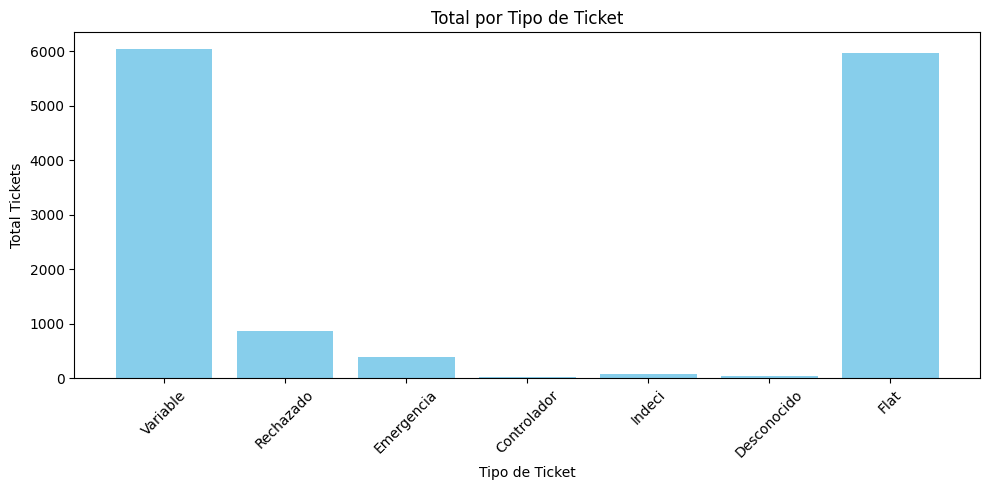

In [110]:
# GRAFICO CON TOTAL DE TICKECTS POR TIPO

# Rellenar valores nulos en "Tipo Ticket" con "Desconocido"
consolidado = consolidado.with_columns(
    pl.col('Tipo Ticket').fill_null('Desconocido'))

# Contar tickets por Tipo Ticket
tipo_count = consolidado.select(
    pl.col('Tipo Ticket').value_counts())

# Desempaquetar el struct 'Tipo Ticket' en sus subcampos
tipo_count = tipo_count.select([
    pl.col('Tipo Ticket').struct.field('Tipo Ticket').alias('Tipo Ticket'),
    pl.col('Tipo Ticket').struct.field('count').alias('count')])

# Convertir los resultados a listas para graficar
tipos = tipo_count['Tipo Ticket'].to_list()
conteos = tipo_count['count'].to_list()

# Grafico del conteo de tickets por Tipo Ticket
plt.figure(figsize=(10, 5))
plt.bar(tipos, conteos, color='skyblue')
plt.title('Total por Tipo de Ticket')
plt.xlabel('Tipo de Ticket')
plt.ylabel('Total Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

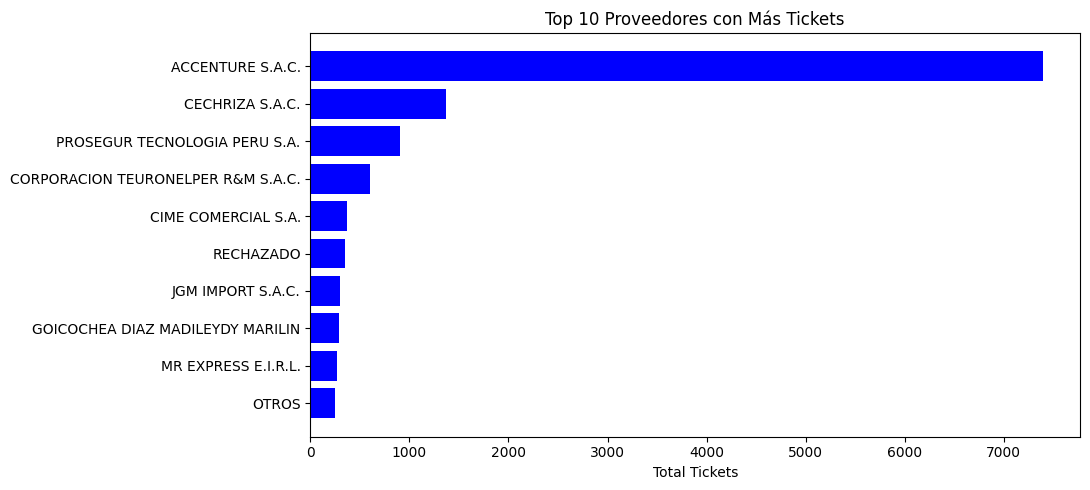

In [111]:
# GRAFICO CON TOP 10 (CANTIDAD DE TICKECTS POR PROVEEDOR)

# Contar tickets por Proveedor
proveedor_count = consolidado.select(
    pl.col('Proveedor').value_counts())

# Desempaquetar la estructura 'Proveedor' en sus subcampos
proveedor_count = proveedor_count.select([
    pl.col('Proveedor').struct.field('Proveedor').alias('Proveedor'),
    pl.col('Proveedor').struct.field('count').alias('count')])

# Filtrar los top 10 proveedores y mantener el orden descendente
top_proveedores = proveedor_count.sort('count', descending=True).head(10)

# Conversion a listas para graficar
proveedores = top_proveedores['Proveedor'].to_list()
conteos = top_proveedores['count'].to_list()

# Grafico Top 10 Proveedores con más Tickets en orden descendente
plt.figure(figsize=(11, 5))
plt.barh(proveedores, conteos, color='blue')
plt.title('Top 10 Proveedores con Más Tickets')
plt.xlabel('Total Tickets')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el mayor esté arriba
plt.tight_layout()
plt.show()

<ipython-input-112-8816f3089e61>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


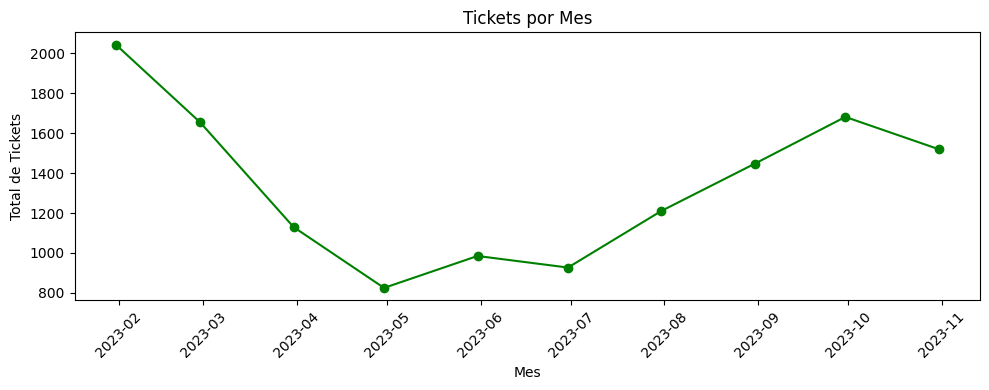

In [112]:
# ANALISIS HISTORICO DE TICKECTS POR MES

# Convertir el DataFrame de Polars a pandas
consolidado_pd = consolidado.to_pandas()

# Conversion de Columna 'Fecha Creacion' a Pandas
consolidado_pd['Fecha Creacion'] = pd.to_datetime(consolidado_pd['Fecha Creacion'])

# Conteo de tickets por mes
tickets_por_mes = (consolidado_pd
                   .set_index('Fecha Creacion')
                   .resample('M')
                   .size()
                   .reset_index(name='Total de Tickets'))

# Grafico de lineas de tickects por mes
plt.figure(figsize=(10, 4))
plt.plot(tickets_por_mes['Fecha Creacion'], tickets_por_mes['Total de Tickets'], marker='o', color='green')
plt.title('Tickets por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tasa de Cierre de Tickets: 84.66%


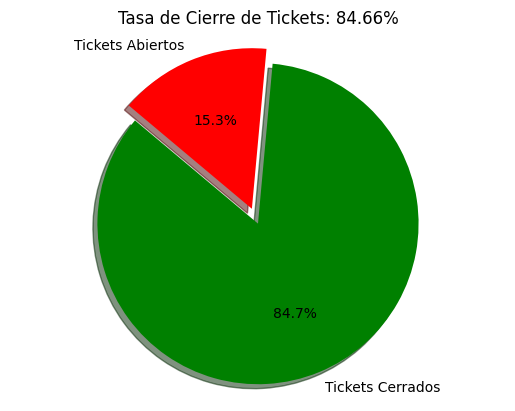

In [113]:
# ANALISIS DE LA TASA DE CIERRE DE TICKECTS

# Considerando a 'consolidado' como DataFrame de Polars
total_tickets = consolidado.shape[0]
tickets_cerrados = consolidado.filter(pl.col('Fecha Cierre').is_not_null()).shape[0]

# Calcular la Tasa de Cierre
tasa_cierre = tickets_cerrados / total_tickets

print(f'Tasa de Cierre de Tickets: {tasa_cierre:.2%}')

# Crea un gráfico de torta para la tasa de cierre
labels = ['Tickets Cerrados', 'Tickets Abiertos']
sizes = [tickets_cerrados, total_tickets - tickets_cerrados]
colors = ['green', 'red']
explode = (0.1, 0)  # resaltar el primer segmento

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'Tasa de Cierre de Tickets: {tasa_cierre:.2%}')
plt.axis('equal')  # asegurar que el gráfico sea un círculo
plt.show()

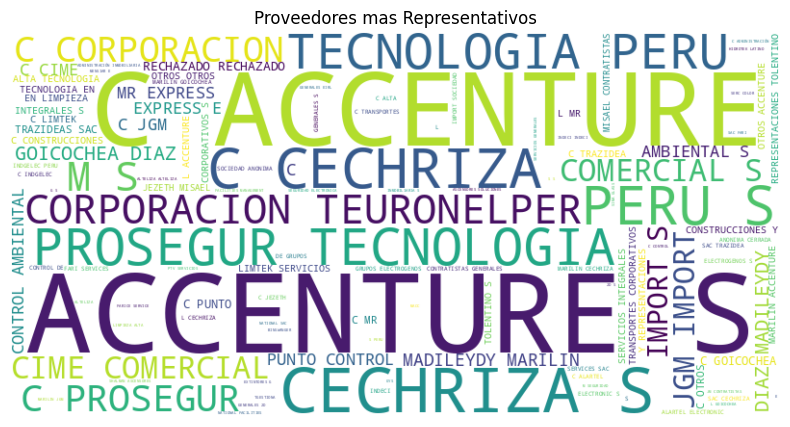

In [114]:
# Nube de Palabras de Proveedores mas Representativos
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtén una lista de todos los proveedores
proveedores = consolidado['Proveedor'].to_list()

# Crea una cadena de texto que contenga todos los proveedores, separados por espacios
texto_proveedores = ' '.join(proveedores)

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_proveedores)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Proveedores mas Representativos')
plt.show()

# **Almacenamiento del Nuevo Dataframe**

In [115]:
# Almacenamiento del consolidado excel en el presente entorno de trabajo
consolidado.write_excel(workbook='/content/Consolidado.xlsx',
                        worksheet='Atenciones',
                        table_style="Table Style Medium 2",
                        dtype_formats={pl.Date: "mm/dd/yyyy"},
                        float_precision=2,
                        autofit=True)